### EVODEX Synthesis Demonstration

This notebook demonstrates the use of the EVODEX synthesis package, a tool designed for predicting mechanistically plausible enzymatic reaction products. The package facilitates the application of reaction operators to substrates, simulating the mechanistic steps that enzymes can catalyze.

The EVODEX synthesis package assumes that 'ubiquitous metabolites' such as amino acids and cofactors (available from a list in `evodex/data/ubiquitous_metabolites.txt`) are present in the reaction environment, along with a suitable enzyme to catalyze the reaction. This enables the prediction of all mechanistically possible products from a given substrate without considering enzyme specificity.

The package has three main functions:

1. `project_reaction_operator`: This function inputs a reaction operator expressed as a SMIRKS string and the substrate to apply it to as a SMILES string. It returns the list of all possible unique products of applying the operator to that substrate. This function is not specific to EVODEX and serves only as a wrapper of the required RDKit functionality.

2. `project_evodex_operator`: This function is similar to the previous one, but it takes the EVODEX ID of the operator as input instead of the SMIRKS. It looks up the SMIRKS from its datastore of EVODEX data to perform the projection.

3. `project_synthesis_operators`: This function applies all operators in the synthesis subset of EVODEX-E to the substrate and returns all that apply along with their product(s). It can be thought of as predicting all mechanistically possible products that could result from one enzymatic step of any kind applied to the input substrate.


In [ ]:
# Installation of the EVODEX library and import of synthesis methods
!pip install evodex
from evodex.synthesis import project_reaction_operator, project_evodex_operator, project_synthesis_operators

# Additional imports used in this notebook
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Specification of a substrate and operator

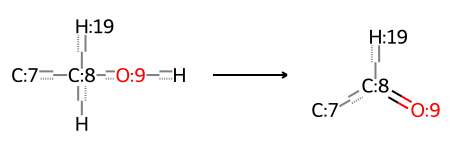

In [ ]:
# A representation of the oxidation of an alcohol, comparable to EVODEX.1-E2:
smirks = "[H][C:8]([C:7])([O:9][H])[H:19]>>[C:7][C:8](=[O:9])[H:19]"
rxn = AllChem.ReactionFromSmarts(smirks)
rxn

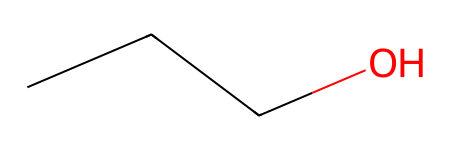

In [ ]:
# Propanol as a test substrate:
substrate = "CCCO"
sub = Chem.MolFromSmiles(substrate)
sub

# Project Reaction Operator

Direct projection:  ['[H]C(=O)C([H])([H])C([H])([H])[H]']


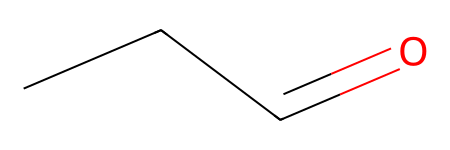

In [ ]:
# Project the oxidation operator on propanol:
result = project_reaction_operator(smirks, substrate)
print("Direct projection: ", result)
pdt = Chem.MolFromSmiles(result[0])
pdt

# Project Evodex Operator

Referenced EVODEX projection:  ['[H]C(=O)C([H])([H])C([H])([H])[H]']


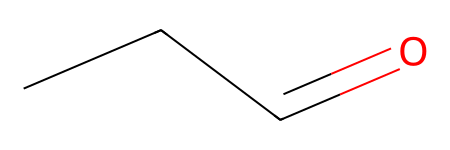

In [ ]:
# Specify the dehydrogenase reaction by its EVODEX ID:
evodex_id = "EVODEX.1-E40"

# Apply the kinase operator to propanol
result = project_evodex_operator(evodex_id, substrate)
print("Referenced EVODEX projection: ", result)
pdt = Chem.MolFromSmiles(result[0])
pdt

# Project Synthesis Operators

In [ ]:
# Project All Synthesis Subset EVODEX-E
# substrate = "CCCN"
result = project_synthesis_operators(substrate)
print("All Synthesis Subset projection: ", result)


All Synthesis Subset projection:  {'EVODEX.1-E1023': ['[H]OP(=O)(O[H])OC([H])([H])C([H])([H])C([H])([H])[H]'], 'EVODEX.1-E1043': ['[H]OS(=O)(=O)OC([H])([H])C([H])([H])C([H])([H])[H]'], 'EVODEX.1-E1109': ['[H]C(=C([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C(=O)OC([H])([H])C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H]'], 'EVODEX.1-E1199': ['[H]OC([H])([H])[C@@]1([H])O[C@@]([H])(OC2([H])[C@@]([H])(O[H])[C@@]([H])(C([H])([H])O[H])O[C@@]([H])(OC([H])([H])C([H])([H])C([H])([H])[H])[C@]2([H])N([H])C(=O)C([H])([H])[H])[C@]([H])(O[H])[C@@]([H])(O[H])[C@@]1([H])O[H]'], 'EVODEX.1-E1208': ['[H]OC1([H])C([H])(O[H])[C@]([H])(O[H])C([H])(OC([H])([H])C([H])([H])C([H])([H])[H])O[C@@]1([H])C([H])([H])[H]'], 'EVODEX.1-E1215': ['[H]OP(=O)(O[H])OP(=O)(O[H])OC([H])([H])C([H])([H])C([H])([H])[H]'], 'EVODEX.1-E1220': ['[H]OC(=O)[C@@]1(OC([H])([H])C([H])([H]

# Display the products


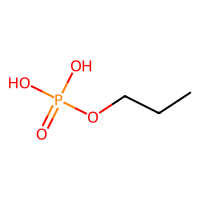
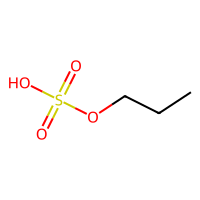
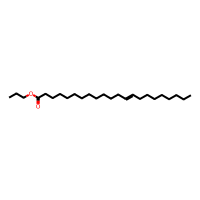
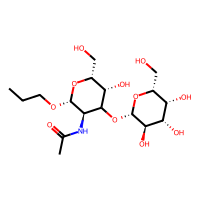
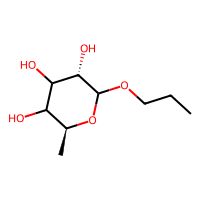
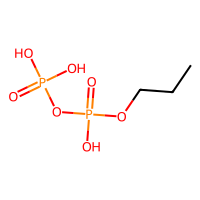
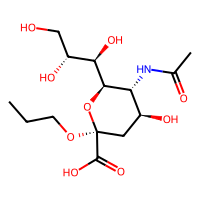
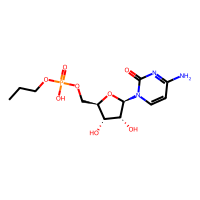
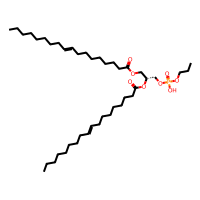
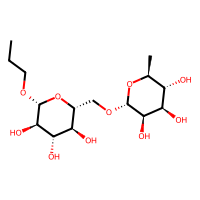
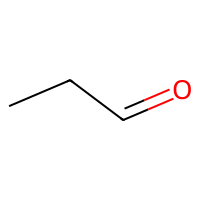
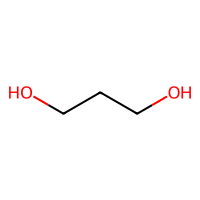
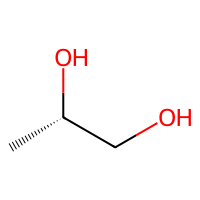
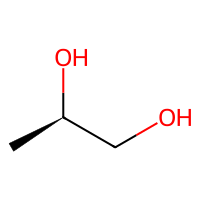
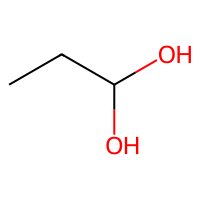
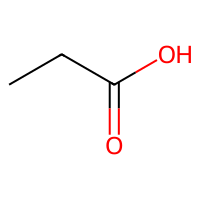
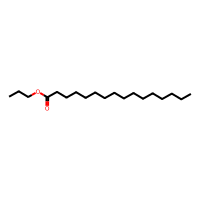
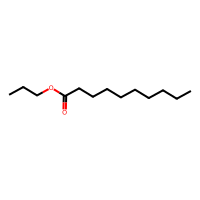
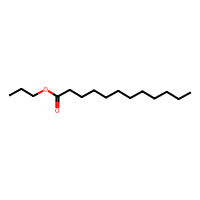
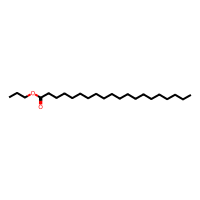
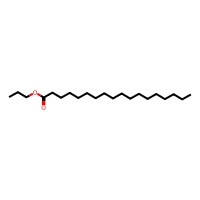
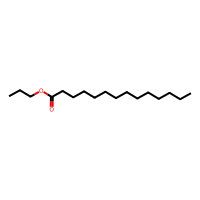
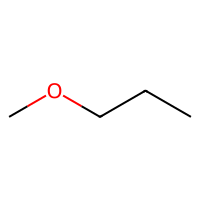
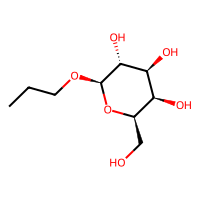
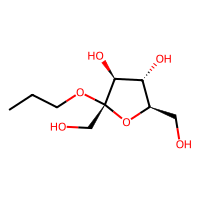
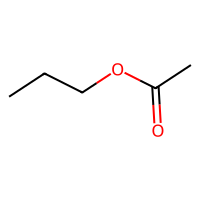
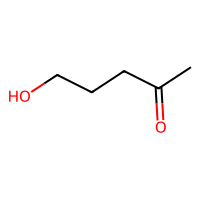
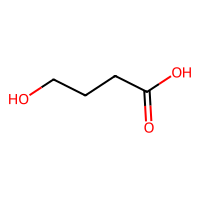
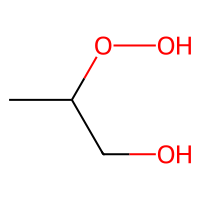
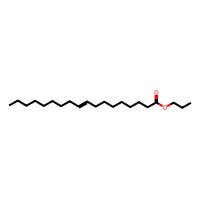
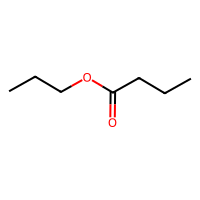
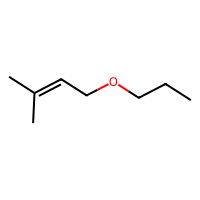
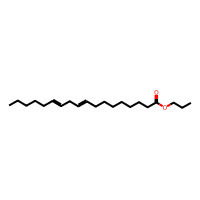
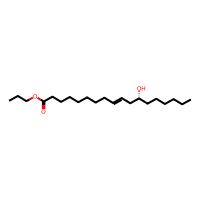
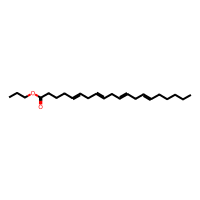
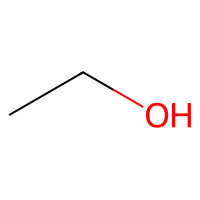
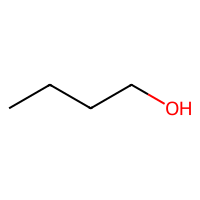
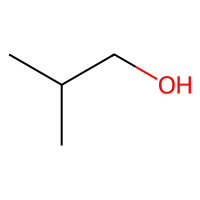
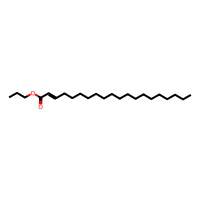
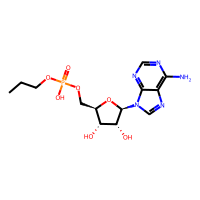
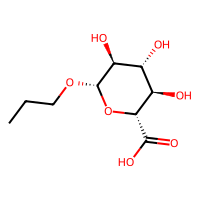
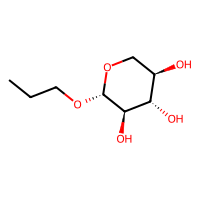
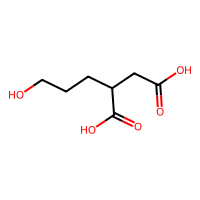
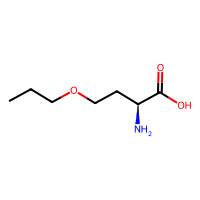
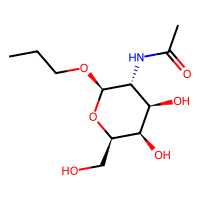
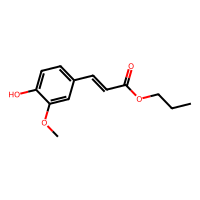
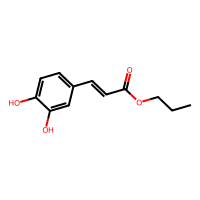
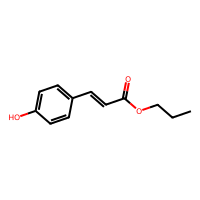
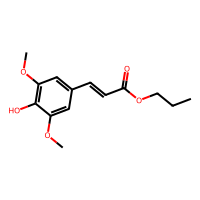

In [ ]:
from IPython.display import display, HTML

# Convert result to DataFrame
df_result = pd.DataFrame(list(result.items()), columns=['EVODEX ID', 'Predicted Products'])
df_result = df_result.explode('Predicted Products')

# Generate image and hyperlink HTML
html = "<table><tr>"

for idx, row in df_result.iterrows():
    mol = Chem.MolFromSmiles(row['Predicted Products'])
    img = Draw.MolToImage(mol, size=(200, 200))
    link = f"https://ucb-bioe-anderson-lab.github.io/evodex-1-site/website/pages/{row['EVODEX ID']}.html"
    # Convert image to base64
    from io import BytesIO
    import base64
    buffer = BytesIO()
    img.save(buffer, format="PNG")
    img_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
    html += f"<td><a href='{link}' target='_blank'><img src='data:image/png;base64,{img_str}'/><br>{row['EVODEX ID']}</a></td>"

    if (idx + 1) % 3 == 0:
        html += "</tr><tr>"

html += "</tr></table>"

# Display
display(HTML(html))